## Quarentena de dados - Aula 01


Alguns exemplos e exercicios propostos na Quarentena de dados da Alura/Data Hackers

In [136]:
# Importando classes que serão usadas no notebook
import pandas as pd
import matplotlib.pyplot as plt
# Informando o jupyter para plotar os gráficos no notebook
%matplotlib inline

In [137]:
# Lendos os arquivos de filmes e notas
df_movies = pd.read_csv("ml-latest-small/movies.csv")
df_ratings = pd.read_csv('ml-latest-small/ratings.csv')
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
# Agrupando por nota média por filme
nota_media_por_filme = df_ratings.groupby(by='movieId')['rating'].mean()
nota_media_por_filme.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

In [138]:
# Fazendo um join das médias com o data frame de filmes
filmes_com_media = df_movies.join(nota_media_por_filme, on="movieId")
filmes_com_media.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [139]:
# Ordernar por rating
filmes_com_media.sort_values(by="rating", ascending=False)

,movieId,title,genres,rating
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


### Exercício 1: Mudar o nome da coluna rating por média após o join

In [140]:
# Criando um dataframe filmes_com_medi e renomeando a coluna rating
filmes_com_media = df_movies.join(nota_media_por_filme, on="movieId").rename(columns={'rating': "media"})
filmes_com_media.head()

,movieId,title,genres,media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


### arredondar média para 2 casas decimais

In [141]:
filmes_com_media['media'] = filmes_com_media['media'].round(2)
filmes_com_media.head()

,movieId,title,genres,media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07


### Exercício 2: Mostar o número de avaliação de cada filme

In [142]:
numero_avaliacao_por_filme = df_ratings['movieId'].value_counts().rename_axis('movieId')
numero_avaliacao_por_filme

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
5986        1
100304      1
34800       1
83976       1
8196        1
Name: movieId, Length: 9724, dtype: int64

In [173]:
# Fazendo join da tabela de filmes com a quantidade de votos
filmes_com_media_e_qtd_avaliacao = filmes_com_media.join(numero_avaliacao_por_filme, on='movieId',lsuffix='_left', rsuffix='_right')
# Renomeando a nova coluna
filmes_com_media_e_qtd_avaliacao.rename(columns={'movieId_right': 'qtd_votos'}, inplace=True)
# Mudando valores nulos de qtd_votos e media para 0
filmes_com_media_e_qtd_avaliacao.fillna(0, inplace=True)
# Mudando os tipo de dados da quantidade de votos para int
filmes_com_media_e_qtd_avaliacao['qtd_votos'] = filmes_com_media_e_qtd_avaliacao['qtd_votos'].astype(int) 
filmes_com_media_e_qtd_avaliacao.head()

,movieId_left,title,genres,media,qtd_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7
4,5,Father of the Bride Part II (1995),Comedy,3.07,49


### Exercicio 3: Extraindo a quantidade de gêneros únicos.

In [65]:
filmes_com_media_e_qtd_avaliacao['genres'].str.get_dummies()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [68]:
# Listando quantidade de generos únicos
generos = filmes_com_media_e_qtd_avaliacao['genres'].str.get_dummies()
len(generos.columns)

20

### Exercício 4: Quantas vezes determinado gênero aparece

In [144]:
# merge filmes com genero
filmes_generos = pd.concat([filmes_com_media_e_qtd_avaliacao, generos], axis=1)
filmes_generos.head(3)

,movieId_left,title,genres,media,qtd_votos,(no genres listed),Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [162]:
data = dict()
# Criando um dicionario com o genero e a quantidade que aparece
for gen in generos:
    data[gen] = filmes_generos[gen].sum()

# Criando um dataFrame a partir do dicionario
df_genero_quantidade = pd.DataFrame(data = data.items(), columns=['Genero', 'Quantidade'])
df_genero_quantidade.sort_values(by="Quantidade",ascending=False).head(10).reset_index(drop=True)

,Genero,Quantidade
0,Drama,4361
1,Comedy,3756
2,Thriller,1894
3,Action,1828
4,Romance,1596
5,Adventure,1263
6,Crime,1199
7,Sci-Fi,980
8,Horror,978
9,Fantasy,779


### plotar o grafico de aparições por genero

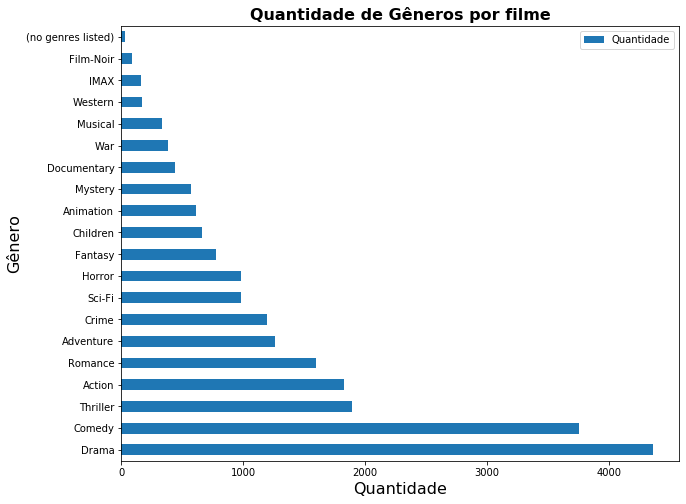

In [166]:
# Posso usar tanto o sort_values quanto o nlargest
df_genero_quantidade.nlargest(df_genero_quantidade.shape[0], 'Quantidade').plot.barh(x='Genero', y='Quantidade',figsize=(10,8))
plt.title("Quantidade de Gêneros por filme", fontdict={"fontweight": "bold", "fontsize":16})
plt.xlabel("Quantidade", fontdict={"fontsize":16})
plt.ylabel("Gênero", fontdict={"fontsize":16})
plt.show()